# Entraînement et évaluation de Naive Bayes (avec des attributs prédictifs quantitatives)

Comme d'habitude, nous travaillerons avec l'ensemble de données iris


In [2]:
#mettre le paquet Naive Bayes à disposition
if (!requireNamespace("e1071", quietly = TRUE)) {
  install.packages("e1071")
}

#for latex parsing of equations
if (!requireNamespace("latex2exp", quietly = TRUE)) {
  install.packages("latex2exp")
}

library(e1071)
library(latex2exp)

#read data
# avec colClasses, nous contrôlons explicitement les types des différentes variables, 
# les valeurs qui nous intéressent le plus sont 
# factor: variables qualitatives
# numeric: pour les variables quantitatives
myData<- read.table("iris.csv",header=T,sep=",",colClasses=c("numeric", "numeric", "numeric", "numeric", "factor"))

In [3]:
head(myData)
dim(myData)

,sepal_length,sepal_width,petal_length,petal_width,type
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,Iris_setosa
2,4.9,3.0,1.4,0.2,Iris_setosa
3,4.7,3.2,1.3,0.2,Iris_setosa
4,4.6,3.1,1.5,0.2,Iris_setosa
5,5.0,3.6,1.4,0.2,Iris_setosa
6,5.4,3.9,1.7,0.4,Iris_setosa


[1] 150   5

In [4]:
#créons l'ensemble de données d'apprentissage
#utilizons 50% des données pour la apprentissage
set.seed(1) #controlled randomness
trainIndex <- sample(1:dim(myData)[1],size=0.5*dim(myData)[1])
trainData <- myData[trainIndex,]
print("Train data")
head(trainData)
dim(trainData)

#et utilisons les restantes pour créer l'ensemble de test
testData <- myData[-trainIndex,]
print("Test data")
head(testData)
dim(testData)

[1] "Train data"


,sepal_length,sepal_width,petal_length,petal_width,type
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
68,5.8,2.7,4.1,1.0,Iris_versicolor
129,6.4,2.8,5.6,2.1,Iris_virginica
43,4.4,3.2,1.3,0.2,Iris_setosa
14,4.3,3.0,1.1,0.1,Iris_setosa
51,7.0,3.2,4.7,1.4,Iris_versicolor
85,5.4,3.0,4.5,1.5,Iris_versicolor


[1] 75  5

[1] "Test data"


,sepal_length,sepal_width,petal_length,petal_width,type
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,Iris_setosa
3,4.7,3.2,1.3,0.2,Iris_setosa
4,4.6,3.1,1.5,0.2,Iris_setosa
5,5.0,3.6,1.4,0.2,Iris_setosa
8,5.0,3.4,1.5,0.2,Iris_setosa
9,4.4,2.9,1.4,0.2,Iris_setosa


[1] 75  5

In [5]:
#Train a Naive Bayes on myData.
#The parameter:
# formula=result~.
#sets the target/class variable to be the type.
#and use as predictive variables all the others
#Entraîner un Naive Bayes sur myData.
#Le paramètre :
# formula=result~.
#définit la variable cible/classe comme étant le result
#et utilise comme variables prédictives toutes les autres variables
nb<-naiveBayes(formula=type~.,data=trainData)

In [6]:
#Voyons ce que nous avons dans le modèle
nb


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
    Iris_setosa Iris_versicolor  Iris_virginica 
      0.3733333       0.2666667       0.3600000 

Conditional probabilities:
                 sepal_length
Y                     [,1]      [,2]
  Iris_setosa     4.978571 0.3541888
  Iris_versicolor 5.975000 0.4540751
  Iris_virginica  6.748148 0.6441275

                 sepal_width
Y                     [,1]      [,2]
  Iris_setosa     3.414286 0.3960119
  Iris_versicolor 2.810000 0.2174009
  Iris_virginica  2.988889 0.3693376

                 petal_length
Y                     [,1]      [,2]
  Iris_setosa     1.464286 0.2022362
  Iris_versicolor 4.395000 0.4135533
  Iris_virginica  5.637037 0.6245910

                 petal_width
Y                      [,1]      [,2]
  Iris_setosa     0.2607143 0.1257254
  Iris_versicolor 1.3400000 0.1788854
  Iris_virginica  2.0296296 0.2700638


========================================================================

Les composantes du modèle ont la signification/interprétation suivante :

========================================================================

```A-priori probabilities:
Y
    Iris_setosa Iris_versicolor  Iris_virginica       => Y=type, la variable cible
      0.3733333       0.2666667       0.3600000       => P(type) = {P(setosa),P(versicolor),P(virginica)}

Conditional probabilities:
                 sepal_length
Y                     [,1]      [,2]
  Iris_setosa     4.978571 0.3541888                  => Moyenne, ecart-type de Sepal_length dans Setosa
  Iris_versicolor 5.975000 0.4540751                  => Moyenne, ecart-type de Sepal_length dans Versicolor
  Iris_virginica  6.748148 0.6441275                  => Moyenne, ecart-type de Sepal_length dans Virginica

                 sepal_width
Y                     [,1]      [,2]
  Iris_setosa     3.414286 0.3960119                  => Moyenne, ecart-type de Sepal_width dans Setosa
  Iris_versicolor 2.810000 0.2174009                  => Moyenne, ecart-type de Sepal_width dans Versicolor
  Iris_virginica  2.988889 0.3693376                  => Moyenne, ecart-type de Sepal_width dans Virginica

                 petal_length
Y                     [,1]      [,2]
  Iris_setosa     1.464286 0.2022362                  => etc... 
  Iris_versicolor 4.395000 0.4135533
  Iris_virginica  5.637037 0.6245910

                 petal_width
Y                      [,1]      [,2]
  Iris_setosa     0.2607143 0.1257254                 => etc...
  Iris_versicolor 1.3400000 0.1788854
  Iris_virginica  2.0296296 0.2700638
  
  ```


Nous pouvons récupérer les différentes parties du modèle comme suit

**Remarque**: Comme nous le voyons (et nous nous y attendions), avec des attributs continus, nous nous appuierons sur leur moyenne et leur écart-type conditionnelle. Pour calculer la « probabilité » conditionnelle sachant la class, nous utiliserons maintenant la loi normale, dont la moyenne et l'ecart-type. 

Ainsi, si nous voulons calculer la P(petal_width | setosa ) pour une instance donnée, nous l' obtiendrons comme suit: 

\begin{align}
N( \text{petal_width};\mu_{\text{petal_width|setosa}, \sigma^2_{petal_width|setosa}})& 
=\frac{1}{\sqrt{2 \pi \sigma_{\text{petal_width|setosa}}^2}} \exp{-\frac{(\text{petal_width} - \mu_{\text{petal_width|setosa}})^2}{2 * \sigma_{\text{petal_width|setosa}}^2}} \\
& =\frac{1}{\sqrt{2 \pi 0.1257254^2}} \exp{-\frac{(\text{petal_width} - 0.2607143)^2}{2 * 0.1257254^2}}
\end{align}


Nous n'avons donc plus de tables de probabilités conditionnelles comme on avait pour les variables qualitatives, mais les moyennes et les écarts types conditionnels par classe que nous devons utiliser avec la densité gaussienne afin d'obtenir les probabilités conditionnelles dont nous avons besoin. 

In [7]:
#récupérer les comptes de la variable cible
nb$apriori

Y
    Iris_setosa Iris_versicolor  Iris_virginica 
             28              20              27 

In [21]:
#récupérer les "propabilités conditionnelles" étant donné la variable cible, cad P(x|y)
# * propabilités conditionnelles pour les attributs qualitatifs (titanic)
# * moyennes et écarts types conditionnels de classe pour les attributs quantitatifs (iris)

nb$tables

Iris_setosa,4.978571,0.3541888
Iris_versicolor,5.975000,0.4540751
Iris_virginica,6.748148,0.6441275
Iris_setosa,3.414286,0.3960119
Iris_versicolor,2.810000,0.2174009
Iris_virginica,2.988889,0.3693376
Iris_setosa,1.464286,0.2022362
Iris_versicolor,4.395000,0.4135533
Iris_virginica,5.637037,0.6245910
Iris_setosa,0.2607143,0.1257254
Iris_versicolor,1.3400000,0.1788854


Examinons donc de plus près l'une de ces tables, par exemple ```nb$tables$petal_width```. Ce tableau contient tout ce dont nous avons besoin pour construire les trois distributions conditionnelles $P(\text{petal_width}|\text{setosa})$, $P(\text{petal_width}|\text{versicolor})$, $P(\text{petal_width}|\text{virginica})$. Construisons-les donc.

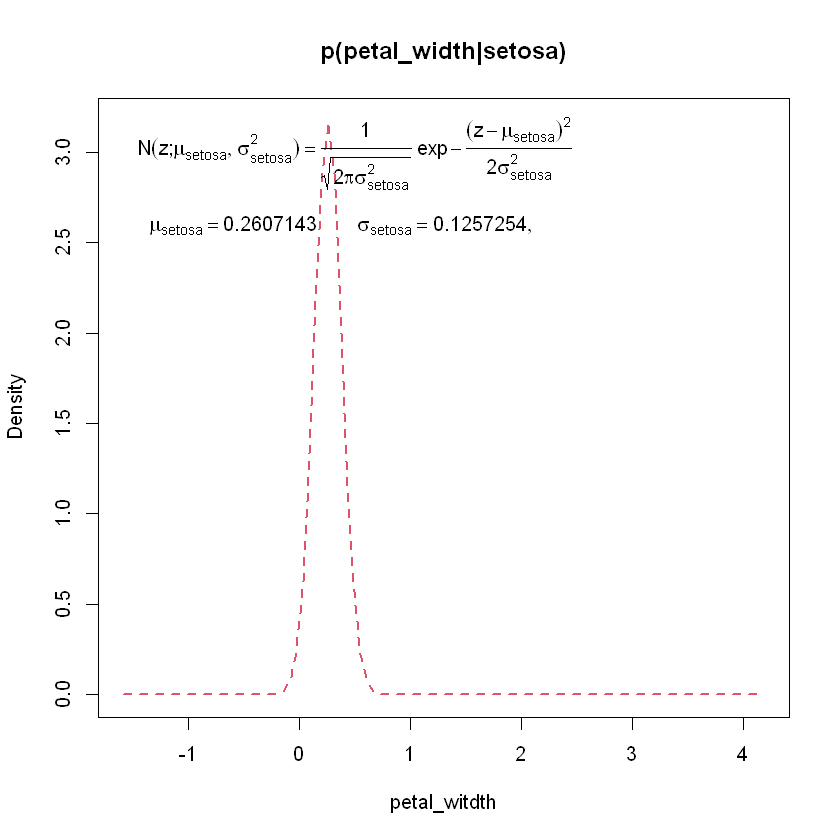

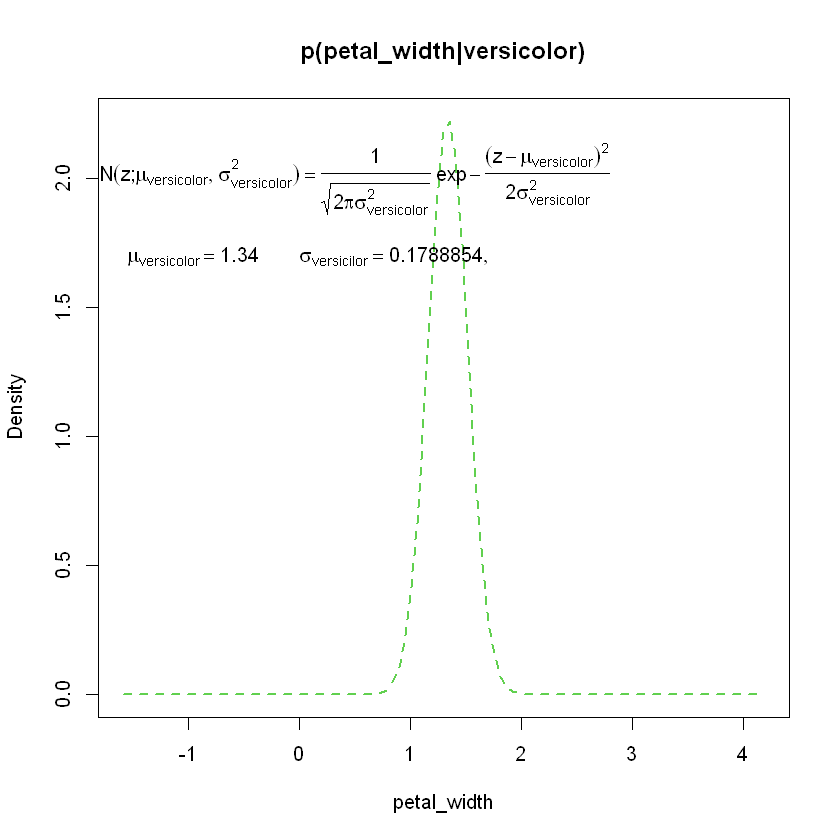

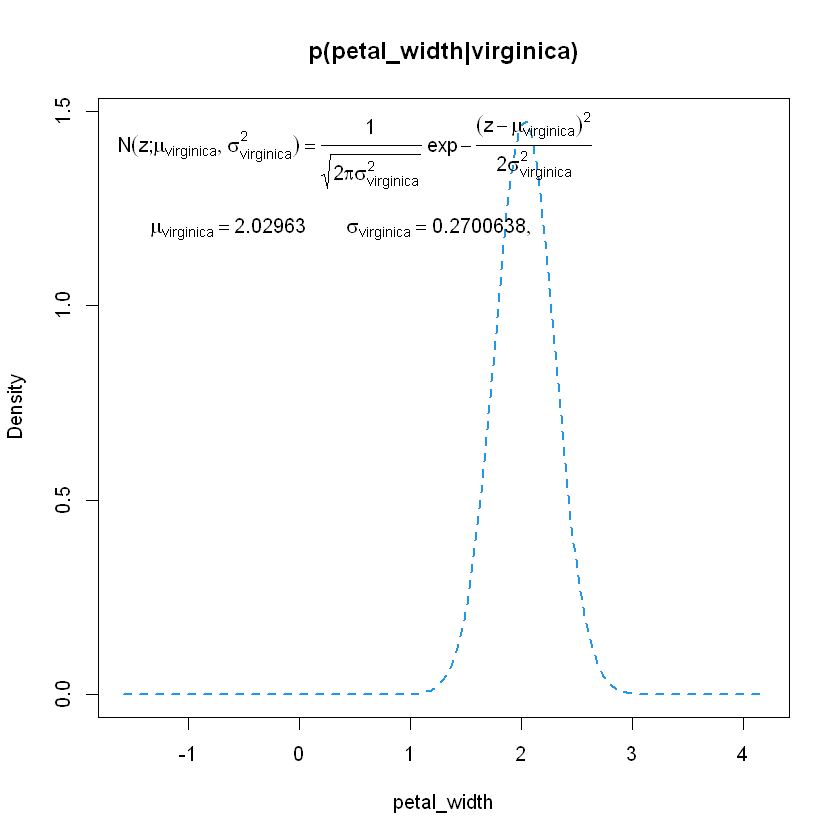

In [22]:
#lets draw the three conditional distributions

#dnorm is the density function of a normal distribution with mean=0 and sd=1
#curve draws the dnorm function from=minimum of petal width+some epsillo to=maximum of petal width + some epsillon, 
#                               the epsillon is there to have a range that includes all the possible values of petal_width
epsillon <- 0.7*(abs(min(myData[,4])-max(myData[,4])))

#1. P(petal_width | setosa), using the means and the standard deviations that NB has already computed
m<-nb$tables$petal_width[1,1] #retrieve the mean of petal_width in setosa
s<-nb$tables$petal_width[1,2] #retrieve the std of petal_width in setosa
curve(dnorm(x,mean=m, sd=s), from=min(myData[,4])-epsillon, to=max(myData[,4])+epsillon, col=2, lty=2,lwd=2, ylab="Density", main="p(petal_width|setosa)", xlab="petal_witdth")
text(x=0.5,y=3, labels=TeX("$N(z;\\mu_{setosa},\\sigma_{setosa}^2)=\\frac{1}{\\sqrt{2 \\pi \\sigma_{setosa}^2}} \\exp{-\\frac{(z - \\mu_{setosa})^2}{2\\sigma_{setosa}^2}}$") )
labelForMeanStd <- paste("$\\mu_{setosa}=",m, "\\ \\ \\ \\ \\sigma_{setosa}=",s,",$")
text(x=0.4,y=2.6, labels=TeX(labelForMeanStd))

#2. P(petal_width | versicolor), using the means and the standard deviations that NB has already computed
m<-nb$tables$petal_width[2,1] #retrieve the mean of petal_width in versicolor
s<-nb$tables$petal_width[2,2] #retrieve the std of petal_width in versicolor
curve(dnorm(x,mean=m, sd=s), from=min(myData[,4])-epsillon, to=max(myData[,4])+epsillon, col=3, lty=2,lwd=2, ylab="Density", main="p(petal_width|versicolor)", xlab="petal_width")
text(x=0.5,y=2, labels=TeX("$N(z;\\mu_{versicolor},\\sigma_{versicolor}^2)=\\frac{1}{\\sqrt{2 \\pi \\sigma_{versicolor}^2}} \\exp{-\\frac{(z - \\mu_{versicolor})^2}{2\\sigma_{versicolor}^2}}$") )
labelForMeanStd <- paste("$\\mu_{versicolor}=",m, "\\ \\ \\ \\ \\sigma_{versicilor}=",s,",$")
text(x=0.1,y=1.7, labels=TeX(labelForMeanStd))


#2. P(petal_width | versicolor), using the means and the standard deviations that NB has already computed
m<-nb$tables$petal_width[3,1] #retrieve the mean of petal_width in virginica
s<-nb$tables$petal_width[3,2] #retrieve the std of petal_width in virginica
curve(dnorm(x,mean=m, sd=s), from=min(myData[,4])-epsillon, to=max(myData[,4])+epsillon, col=4, lty=2,lwd=2, ylab="Density", main="p(petal_width|virginica)", xlab="petal_width")
text(x=0.5,y=1.4, labels=TeX("$N(z;\\mu_{virginica},\\sigma_{virginica}^2)=\\frac{1}{\\sqrt{2 \\pi \\sigma_{virginica}^2}} \\exp{-\\frac{(z - \\mu_{virginica})^2}{2\\sigma_{virginica}^2}}$") )
labelForMeanStd <- paste("$\\mu_{virginica}=",m, "\\ \\ \\ \\ \\sigma_{virginica}=",s,",$")
text(x=0.4,y=1.2, labels=TeX(labelForMeanStd))


Nous pouvons considérer que ces trois distributions conditionnelles correspondent aux tables de distribution conditionnelle que nous avions dans le cas de Titanic, par exemple les distributions conditionnelles de l'attribut âge compte tenu du résultat, $P(\text{age}|\text{result})$, qui étaient les suivantes

```
P(age|result)
      age
Y             adu        enf
  mort 0.96513250 0.03486750
  surv 0.92428198 0.07571802
  ```
  
<img src="P.age.given.result.png" alt="P(age|result)"  width="300" height="200">

Nous pouvons considérer chacune des barres comme l'équivalent des distributions conditionnelles que nous avons tracées ci-dessus pour chacune des classes. Dans le cas des attributs qualitatifs, les tableaux nous donnent directement la probabilité d'une valeur particulière, tandis que dans le cas des attributs quantitatifs, nous calculons cette probabilité à l'aide de la distribution gaussienne. 

Ainsi, dans le cas d'attributs quantitatifs, nous devons utiliser la densité gaussienne pour calculer la probabilité de l'état. On peut se demander dans quelle mesure cette probabilité est exacte. La réponse dépend de la pertinence de l'hypothèse d'une distribution gaussienne. Nous pouvons vérifier cette hypothèse en traçant la distribution réelle des données, en utilisant les histogrammes et en les comparant aux densités respectives. C'est ce que nous allons faire. 

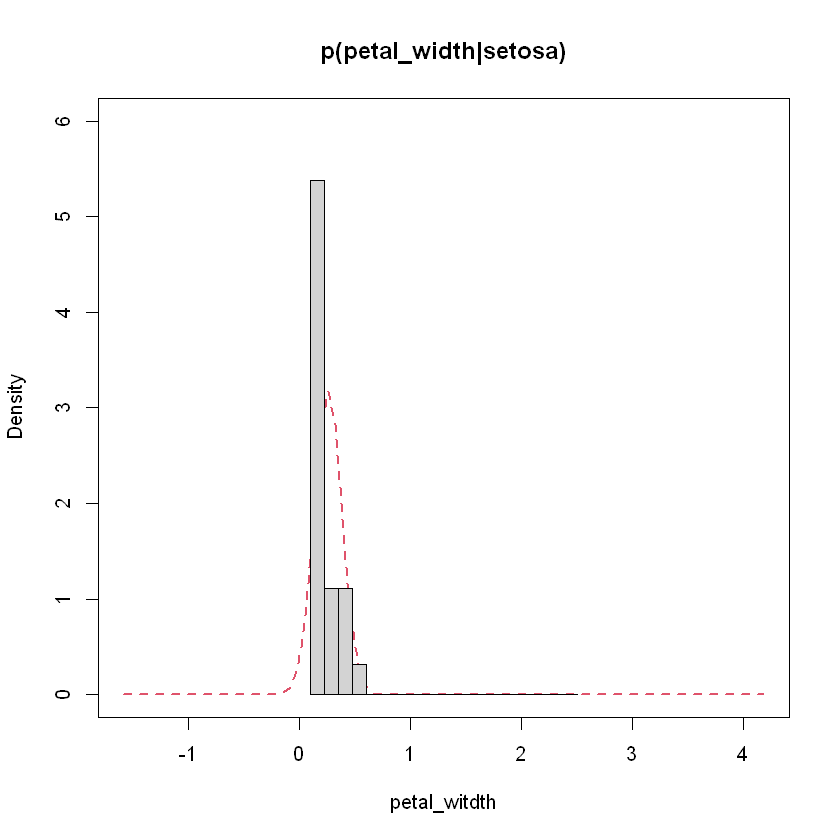

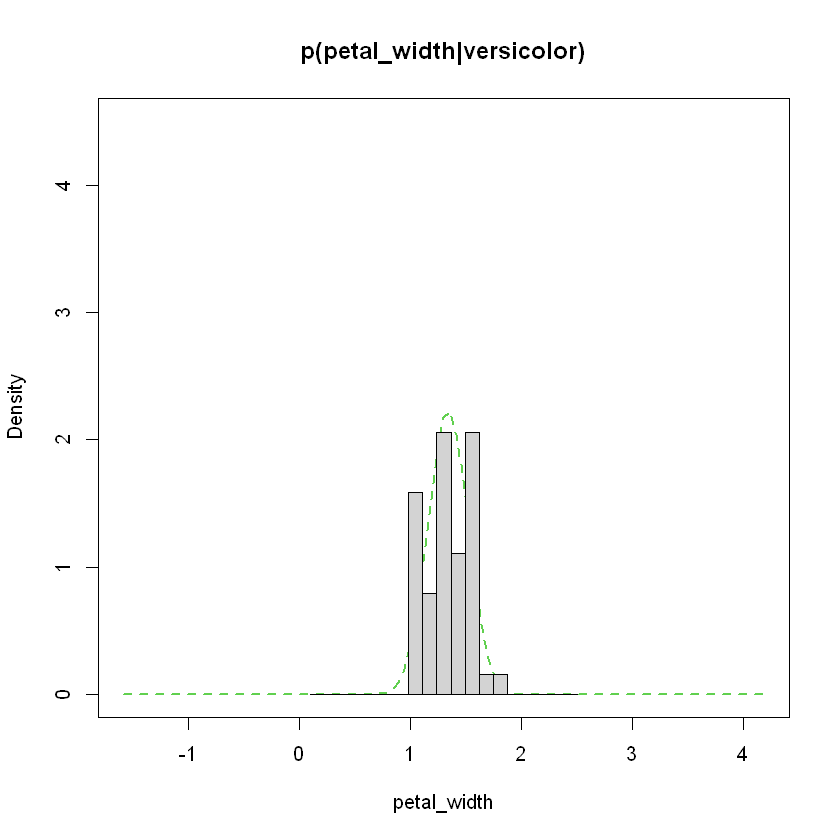

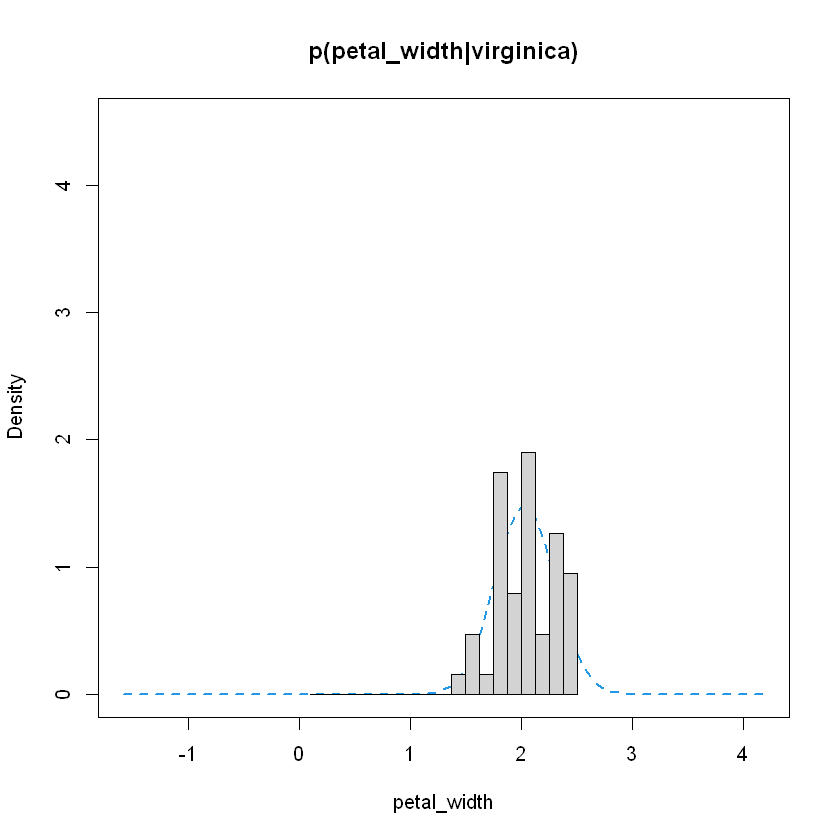

In [10]:
#the code is more or less the same as above where we draw the conditional distributions as these are assumed
#by the naive bayes model to be Gaussians, but now we also add the empirical estimates of these distributions
#as there are given by the data and the respective histograms.

#breaks for the histrograms
minX <- min(myData[,4])
maxX <- max(myData[,4])
breaks = seq(from = minX, to = maxX, length.out=20)


#lets draw the three conditional distributions

#dnorm is the density function of a normal distribution with mean=0 and sd=1
#curve draws the dnorm function from=minimum of petal width+some epsillo to=maximum of petal width + some epsillon, 
#                               the epsillon is there to have a range that includes all the possible values of petal_width
epsillon <- 0.7*(abs(min(myData[,4])-max(myData[,4])))

#1. P(petal_width | setosa), using the means and the standard deviations that NB has already computed
m<-nb$tables$petal_width[1,1] #retrieve the mean of petal_width in setosa
s<-nb$tables$petal_width[1,2] #retrieve the std of petal_width in setosa
curve(dnorm(x,mean=m, sd=s), from=min(myData[,4])-epsillon, to=max(myData[,4])+epsillon, col=2, lty=2,lwd=2, ylab="Density", main="p(petal_width|setosa)", xlab="petal_witdth", ylim=c(0,6))
#text(x=-2,y=1.5, labels=TeX("$N(\\mu_{setosa},\\sigma_{setosa}^2)=\\frac{1}{\\sqrt{2 \\pi \\sigma_{setosa}^2}} \\exp{-\\frac{(z - \\mu_{setosa})^2}{2\\sigma_{setosa}^2}}$") )
#labelForMeanStd <- paste("$\\mu_{setosa}=",m, "\\ \\ \\ \\ \\sigma_{setosa}=",s,",$")
#text(x=-2.2,y=1.3, labels=TeX(labelForMeanStd))
hist(myData[myData[,5]=="Iris_setosa",4],breaks=breaks, freq=FALSE, add=TRUE)


#2. P(petal_width | versicolor), using the means and the standard deviations that NB has already computed
m<-nb$tables$petal_width[2,1] #retrieve the mean of petal_width in versicolor
s<-nb$tables$petal_width[2,2] #retrieve the std of petal_width in versicolor
curve(dnorm(x,mean=m, sd=s), from=min(myData[,4])-epsillon, to=max(myData[,4])+epsillon, col=3, lty=2,lwd=2, ylab="Density", main="p(petal_width|versicolor)", xlab="petal_width", ylim=c(0,4.5))
#text(x=-1.2,y=0.28, labels=TeX("$N(\\mu_{versicolor},\\sigma_{versicolor}^2)=\\frac{1}{\\sqrt{2 \\pi \\sigma_{versicolor}^2}} \\exp{-\\frac{(z - \\mu_{versicolor})^2}{2\\sigma_{versicolor}^2}}$") )
#labelForMeanStd <- paste("$\\mu_{versicolor}=",m, "\\ \\ \\ \\ \\sigma_{versicilor}=",s,",$")
#text(x=-3,y=0.25, labels=TeX(labelForMeanStd))
hist(myData[myData[,5]=="Iris_versicolor",4],breaks=breaks, freq=FALSE, add=TRUE)


#3. P(petal_width | versicolor), using the means and the standard deviations that NB has already computed
m<-nb$tables$petal_width[3,1] #retrieve the mean of petal_width in virginica
s<-nb$tables$petal_width[3,2] #retrieve the std of petal_width in virginica
curve(dnorm(x,mean=m, sd=s), from=min(myData[,4])-epsillon, to=max(myData[,4])+epsillon, col=4, lty=2,lwd=2, ylab="Density", main="p(petal_width|virginica)", xlab="petal_width", ylim=c(0,4.5))
#text(x=-1.2,y=0.18, labels=TeX("$N(\\mu_{virginica},\\sigma_{virginica}^2)=\\frac{1}{\\sqrt{2 \\pi \\sigma_{virginica}^2}} \\exp{-\\frac{(z - \\mu_{virginica})^2}{2\\sigma_{virginica}^2}}$") )
#labelForMeanStd <- paste("$\\mu_{virginica}=",m, "\\ \\ \\ \\ \\sigma_{virginica}=",s,",$")
#text(x=-2.9,y=0.16, labels=TeX(labelForMeanStd))
hist(myData[myData[,5]=="Iris_virginica",4],breaks=breaks, freq=FALSE, add=TRUE)

Comme le montrent les figures, l'hypothèse d'une distribution gaussienne n'est pas très précise/appropriée. 

## évaluation du modèle

actement la même logique que pour les attributs qualitatifs, rien ne change.

In [11]:
#testons le modèle entraîné sur l'ensemble de test que nous avons créé
#predict prend en entrée :
# * le modèle (nb)
# * l'ensemble de test (testData)
#et produit une prédiction pour chaque instance de test
predictions <- predict(nb, testData)
numCorrect <- sum(diag(table(testData[,5],predictions)))
TBC <- numCorrect/nrow(testData)
TBC

[1] 0.9466667

### Partie théorique de Naive Bayes : comprendre comment le modèle classifie/calcule les probabilités

La logique est exactement la même que dans le cas des attributs quantitatifs ; la seule différence réside dans la manière dont les probabilités conditionnelles sont calculées. Comme nous l'avons déjà dit dans le cas des attributs quantitatifs, nous ne disposons pas de tables de probabilités conditionnelles par classe, mais de moyennes et d'écarts types conditionnels par classe que nous utilisons avec la distribution gaussienne pour obtenir les probabilités conditionnelles par classe

In [12]:
#Examinons un instance de test particulier, par exemple le premier
testInstance<-testData[1,]
testInstance
#et les probabilités prédites de mort et de surv
pred1 <- predict(nb, testData[1,],type = "raw")
pred1

,sepal_length,sepal_width,petal_length,petal_width,type
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,Iris_setosa


Iris_setosa,Iris_versicolor,Iris_virginica
1,2.813576e-24,1.755063e-23


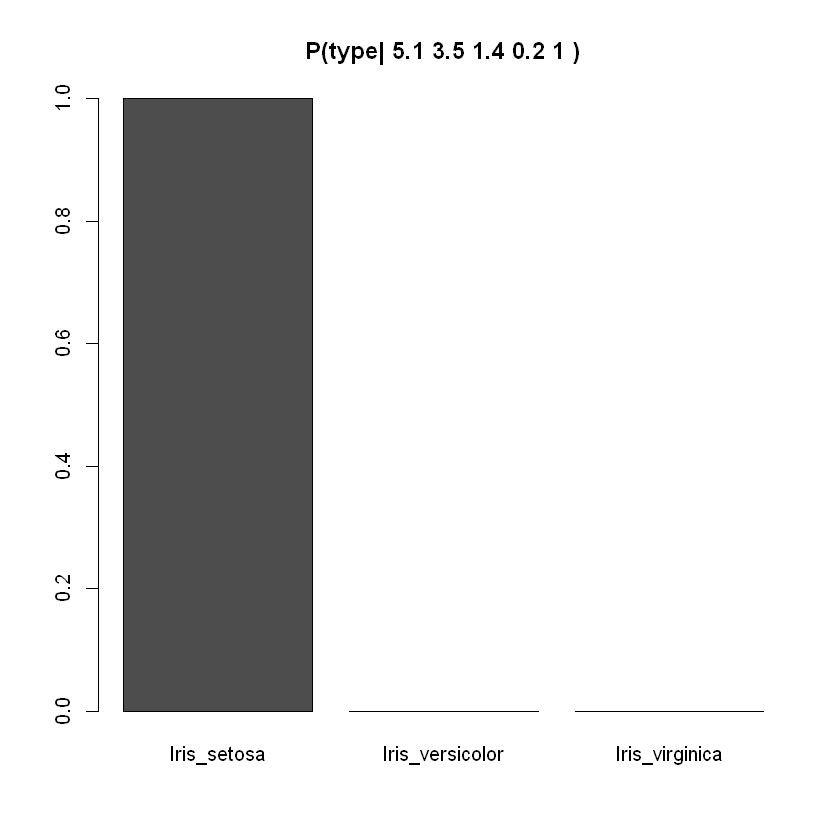

In [13]:
#visualisons la distribution des probabilites de result sachant l' instance: first, adu, m
#cad la distribution a posteriori: de P(result|first, adu, m)
barplot(pred1, main=paste("P(type|",paste(testInstance, collapse=" "),")"))

et voyons comment Naive Bayes utilise les différentes  distributions qu'il a calculées, cad: 
$$ P(\text{sepal_length}|\text{type}), P(\text{sepal_width}|\text{type}), P(\text{petal_width}|\text{type}), P(\text{petal_width}|\text{type}), P(\text{type}) $$
pour calculer ces trois probabilités, cad pour calculer:
$$P(\text{type}|\mathbf x) = \{ P(\text{type}=\text{setosa} |\mathbf x), P(\text{type}=\text{virginica} |\mathbf x)  P(\text{type}=\text{versicolor} |\mathbf x) \}$$
pour notre $\mathbf x = (5.1, 3.5, 1.4, 0.2	)$.


\begin{align}
 P(\text{setosa} | 5.1, 3.5, 1.4, 0.2) & =\frac{P(5.1, 3.5, 1.4, 0.2|\text{setosa}) P(\text{setosa})}{P(5.1, 3.5, 1.4, 0.2)} \\
  = & \frac{P(5.1|\text{setosa}) P(3.5|\text{setosa})
 \times    P(1.4|\text{setosa}) P(0.2|\text{setosa}) 
 \times P(\text{setosa})} 
 {P(5.1, 3.5, 1.4, 0.2)}
\end{align}

a seule différence par rapport au cas des attributs qualitatifs est que, comme nous l'avons dit, nous n'avons plus de tables de probabilités conditionnelles que nous utilisons pour obtenir les probabilités dont nous avons besoin, mais nous les calculerons en utilisant la distribution gaussienne et les moyennes et écarts-types conditionnels de classe appropriés. Donc

\begin{align} 
\frac{P(5.1|\text{setosa}) P(3.5|\text{setosa})
 \times    P(1.4|\text{setosa}) P(0.2|\text{setosa}) 
 \times P(\text{setosa})} 
 {P(5.1, 3.5, 1.4, 0.2)} = \\
  \frac{N(5.1;\mu_{\text{sepal_length|setosa}},\sigma^2_{\text{sepal_length|setosa}}) \times  \\
           N(3.5;\mu_{\text{sepal_width|setosa}},\sigma^2_{\text{sepal_width|setosa}}) \times \\
           N(1.4;\mu_{\text{petal_length|setosa}},\sigma^2_{\text{petal_length|setosa}}) \times \\
           N(0.2;\mu_{\text{petal_width|setosa}},\sigma^2_{\text{petal_width|setosa}}) \times P(\text{setosa}) 
           }{P(5.1, 3.5, 1.4, 0.2)}
\end{align}

Nous pouvons très facilement obtenir chacun des termes : 
* $N(5.1;\mu_{\text{sepal_length|setosa}},\sigma^2_{\text{sepal_length|setosa}})=\frac{1}{\sqrt{2 \pi \sigma_{\text{sepal_length|setosa}}^2}} \exp{-\frac{(5.1 - \mu_{\text{sepal_length|setosa}})^2}{2\sigma_{\text{sepal_length|setosa}}^2}}$
* $N(3.5;\mu_{\text{sepal_width|setosa}},\sigma^2_{\text{sepal_width|setosa}})=\frac{1}{\sqrt{2 \pi \sigma_{\text{sepal_width|setosa}}^2}} \exp{-\frac{(3.5 - \mu_{\text{sepal_width|setosa}})^2}{2\sigma_{\text{sepal_width|setosa}}^2}}$
* $N(1.4;\mu_{\text{petal_length|setosa}},\sigma^2_{\text{petal_length|setosa}})=\frac{1}{\sqrt{2 \pi \sigma_{\text{petal_length|setosa}}^2}} \exp{-\frac{(1.4 - \mu_{\text{petal_length|setosa}})^2}{2\sigma_{\text{petal_length|setosa}}^2}}$
* $N(0.2;\mu_{\text{petal_width|setosa}},\sigma^2_{\text{petal_width|setosa}})=\frac{1}{\sqrt{2 \pi \sigma_{\text{petal_width|setosa}}^2}} \exp{-\frac{(0.2 - \mu_{\text{petal_width|setosa}})^2}{2\sigma_{\text{petal_width|setosa}}^2}}$

In [14]:
#lets just compute the first one: P(sepal_length=5.1|setosa)
m<-nb$tables$sepal_length[1,1]
s<-nb$tables$sepal_length[1,2]

#compute now the density N(5.1;m,s)
dnorm(5.1,m,s)

[1] 1.062068

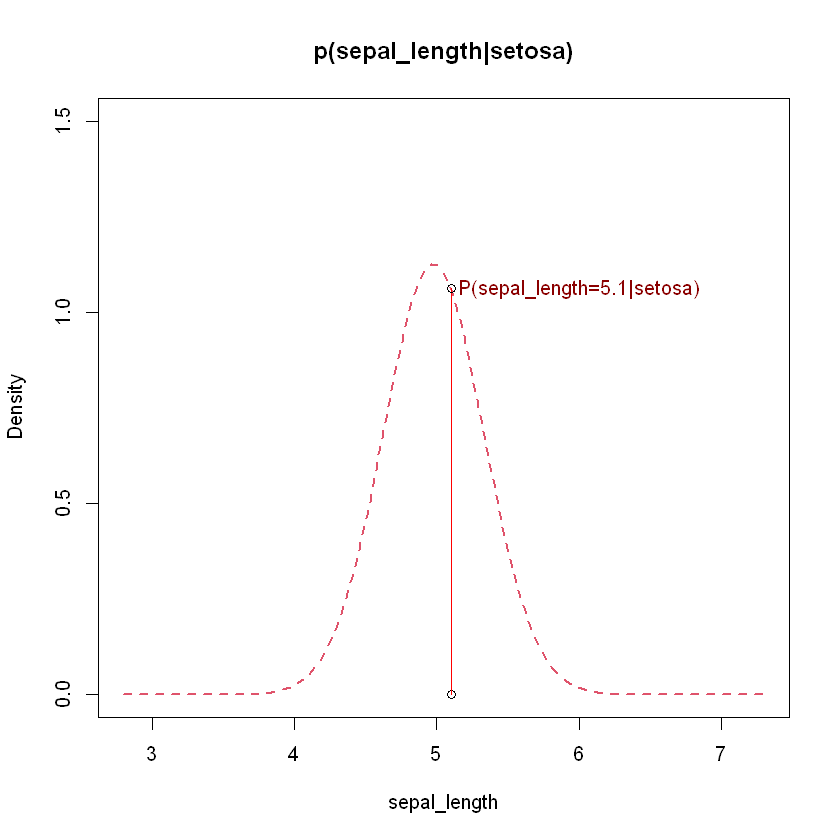

In [15]:
#and lets visualise this probability/density
#P(sepal length | setosa), and its evaluation at sepal_length=5.1
epsillon <- (abs(min(myData[myData[,5]=="Iris_setosa",1])-max(myData[myData[,5]=="Iris_setosa",1])))
curve(dnorm(x,mean=m, sd=s), from=min(myData[myData[,5]=="Iris_setosa",1])-epsillon, to=max(myData[myData[,5]=="Iris_setosa",1])+epsillon, col=2, lty=2,lwd=2, ylab="Density", main="p(sepal_length|setosa)", xlab="sepal_length", ylim=c(0,1.5))
text(x=-2,y=1.5, labels=TeX("$N(\\mu_{setosa},\\sigma_{setosa}^2)=\\frac{1}{\\sqrt{2 \\pi \\sigma_{setosa}^2}} \\exp{-\\frac{(z - \\mu_{setosa})^2}{2\\sigma_{setosa}^2}}$") )
labelForMeanStd <- paste("$\\mu_{setosa}=",m, "\\ \\ \\ \\ \\sigma_{setosa}=",s,",$")
text(x=-2.2,y=1.3, labels=TeX(labelForMeanStd))

#plot the point that corresponds to petal_length=5.1
points(x=5.1,y=0)

#and show its corresponding density
points(x=c(5.1,5.1),y=c(0,dnorm(5.1,m,s)),col="red",type="l")
points(x=5.1,y=dnorm(5.1,m,s))
text(x=6,y=dnorm(5.1,m,s), labels="P(sepal_length=5.1|setosa)",col="darkred")


# Exercises

**Exercise** Entraîner un modèle naïf de Bayes sur 70% de l'ensemble de données d'iris, en utilisant uniquement les attributs sepal_length et petal_length et uniquement les deux classes : virginica et versicolor. Extraire et visualiser les distributions suivantes à partir du modèle

* P(type)
* P(sepal_length|type)
* P(petal_length|type)

Utilisez les distributions ci-dessus pour expliquer comment le modèle Naive Bayes calculera la probabilité de setosa pour l'instance $\mathbf x = (6.9, 3.1)$. 

In [16]:
#code here
#creates the simpler iris
reducedIris <- myData[myData[,5]!="Iris_setosa",c(1,3,5)]

#...

# Appendix

A somehow more generic (though not very generic) function that plots in one go all conditional distributions for all attributes as these are given by the naive bayes model. It assumes that all attributes are numeric.

In [23]:
#Using colorspace Package, which allows to control colors transperancy
#while indexing colors with integer indeces
#Install and load the colorspace package if you haven't already
package_name <- "colorspace"
# Check if the package is installed
if (!require(package_name, character.only = TRUE)) {
    install.packages(package_name)
}
library(package_name, character.only = TRUE)

#receives as input:
# * myData : the dataset
# * nb : a naive bayes model trained on that dataset
# * classColIndex : the index of the class attributes
# it will plot the all class conditional distributions for each attribute
# Attention: it assumes that all attributes are numeric
condDist <- function(myData, nb, classColIndex){

    numAttrs <- dim(myData)[1]-1
    numClasses<-length(unique(myData[,classColIndex]))

    
    for (attribute in 1:length(nb$tables)) {

        par(mfrow = c(1,2))
    
        condDistStats<-nb$tables[[attribute]]
        attrName    <- names(nb$tables[attribute])
        numClasses  <- nrow(condDistStats)
        classNames <- rownames(condDistStats)
    
    
        minVal <- min(myData[,attribute])
        maxVal <- max(myData[,attribute])

        epsillon <- (abs(minVal-maxVal))
    
        breaks = seq(from = minVal-epsillon, to = maxVal+epsillon, length.out=30)
    

        #go over the classes
        add=FALSE #first time in the loop add = False to create a new figure
        for(classIndex in 1:numClasses){
            m<-condDistStats[classIndex,1] #retrieve the mean of petal_width in setosa
            s<-condDistStats[classIndex,2] #retrieve the std of petal_width in setosa
            className <- classNames[classIndex]
            curve(dnorm(x,mean=m, sd=s), 
                  from=minVal-epsillon, to=maxVal+epsillon, 
                  col=classIndex, lty=2,lwd=2, 
                  ylab="Density", 
                  main=paste("p(",attrName,"|",names(myData)[classColIndex],")"), 
                  xlab=attrName, add=add)
            add=TRUE
        }
        legend("topright", legend=classNames,fill=1:numClasses)
     
        add=FALSE
        for(classIndex in 1:numClasses){
            className <- classNames[classIndex]
            transparentColor <- adjust_transparency(palette()[classIndex], alpha = 0.5) #adds transparency for better visuals
            hist(myData[myData[,classColIndex]==className,attribute],
             breaks=breaks,
             add=add,col=transparentColor, 
             main=paste("p(",attrName,"|",names(myData)[classColIndex],")"), 
             xlab=attrName)
            add=TRUE
        }
        legend("topright", legend=classNames,fill=1:numClasses)

    }
}

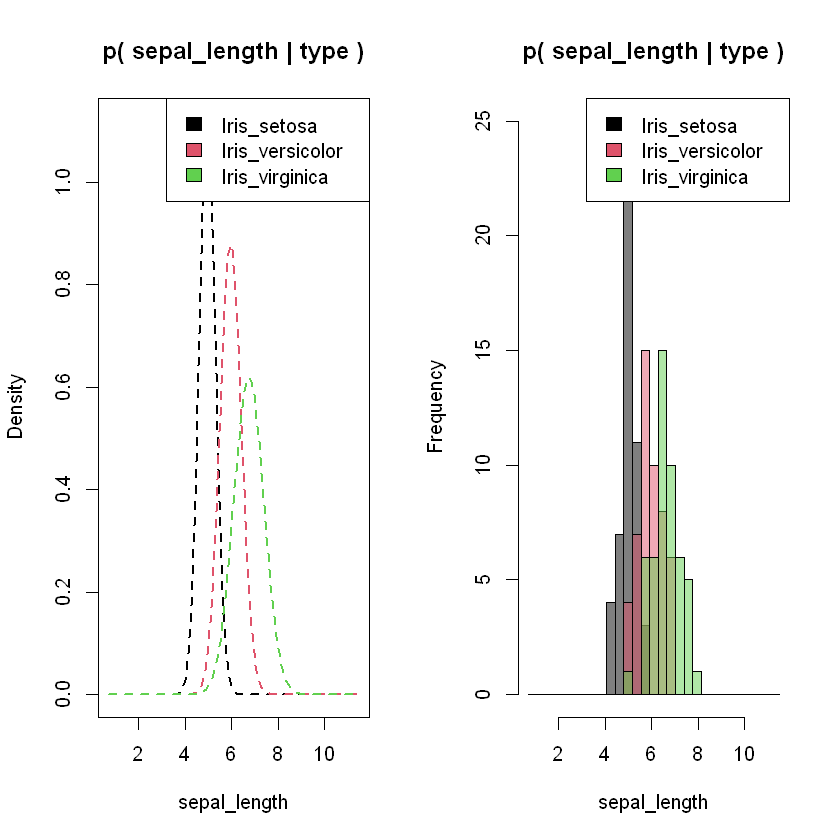

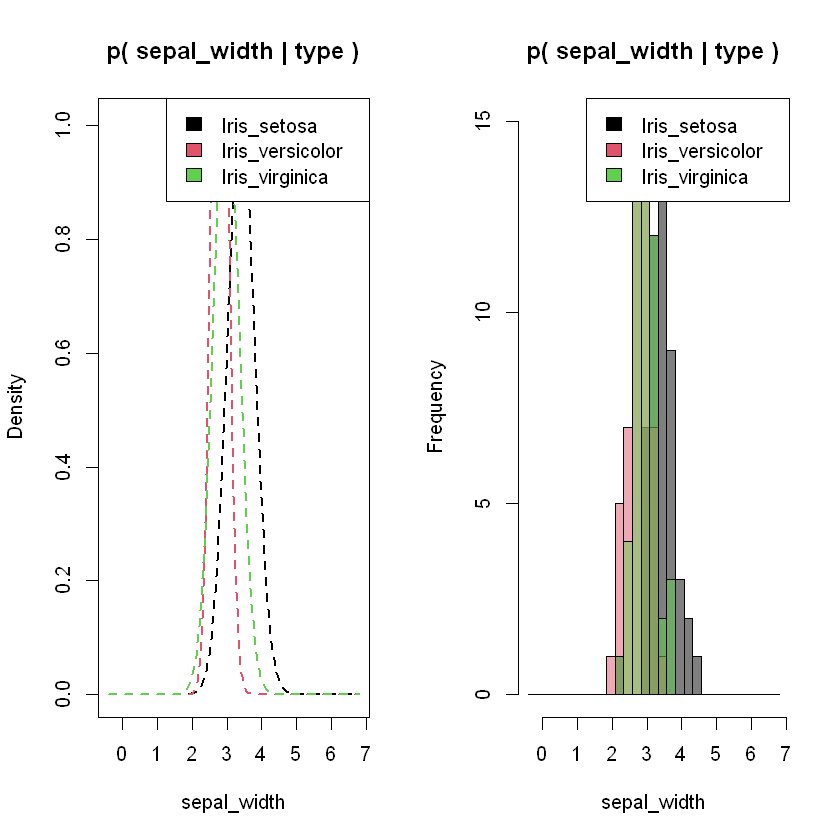

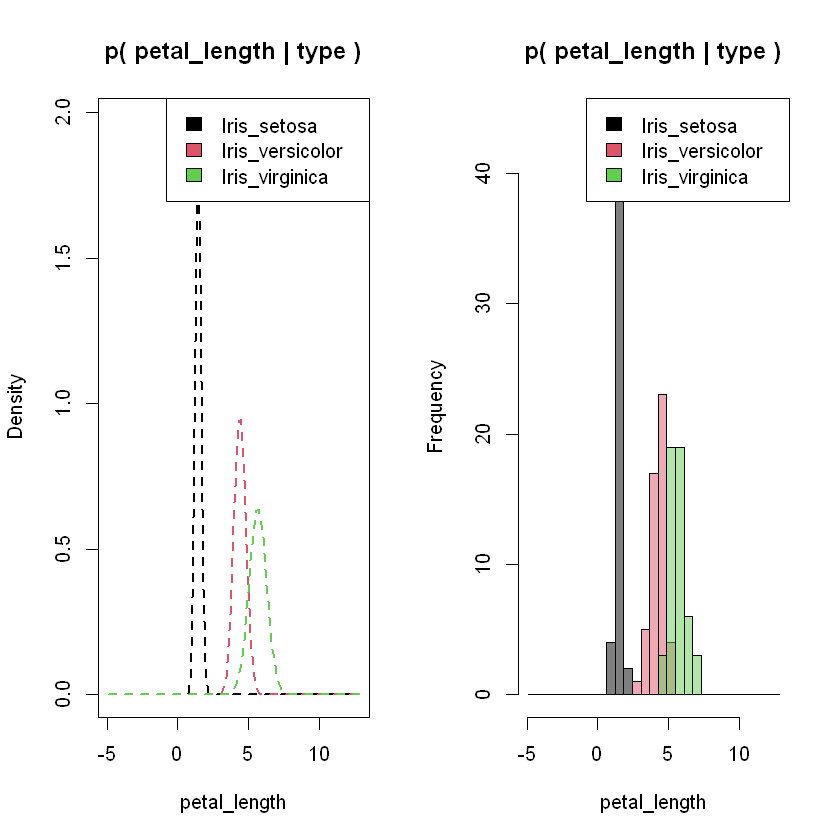

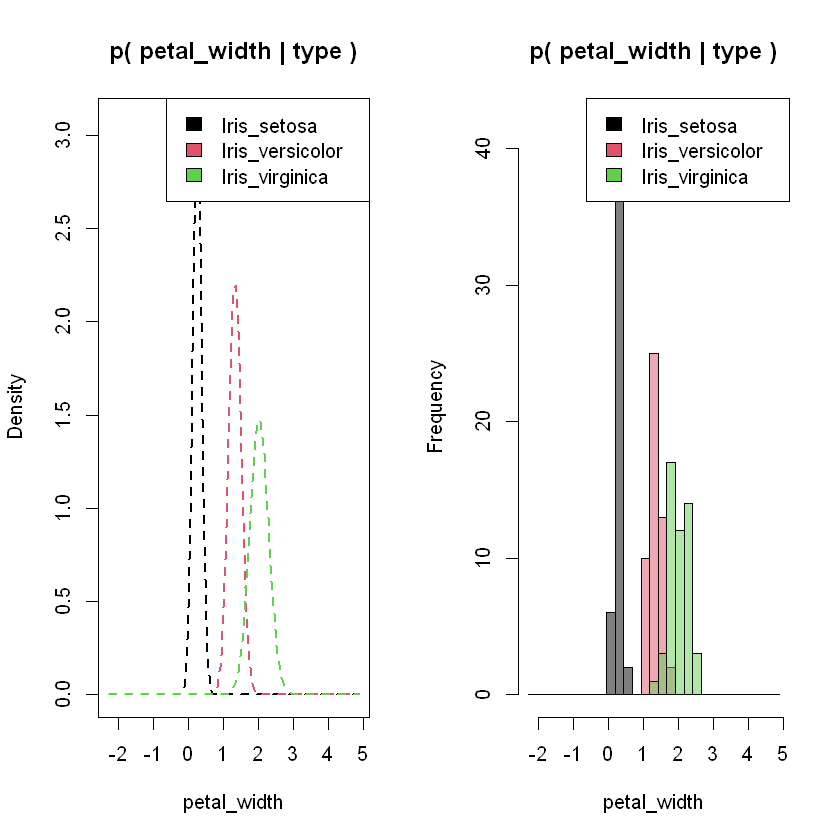

In [18]:
condDist(myData,nb,5)